<a href="https://colab.research.google.com/github/Sid-rocco/Sid-rocco/blob/main/CNN-MNIST/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

(trainX, trainY), (testX, testY) = keras.datasets.mnist.load_data()

# print('Train: x=%s, y=%s'% (trainX.shape, trainY.shape))
# print('Test: x=%s, y=%s'% (testX.shape, testY.shape))

no_Classes = 10
input_class_shape = (28,28,1)
input_size = 28

# Normalization of the pixels along row pixels
trainX = keras.utils.normalize(trainX, axis=1)
testX = keras.utils.normalize(testX, axis=1)

# plt.imshow(trainX[0], cmap=plt.cm.binary)
# print(trainY[0])

trainX = np.array(trainX).reshape(-1, input_size, input_size, 1)
testX = np.array(testX).reshape(-1, input_size, input_size, 1)


model = Sequential(
    [
    layers.Conv2D(32, (3, 3), input_shape= input_class_shape, activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    # layers.Flatten(),
    # layers.Dropout(0.5),
    # layers.Dense(no_Classes, activation="softmax"),

    layers.Flatten(), # convert it into an array to perfrom neural network
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
    ]
)

model.summary()


11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                         

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(trainX, trainY, batch_size= 100, epochs=20, validation_split=0.1)
score = model.evaluate(testX, testY)
print("Test loss: ", score[0])
print("Test acc: ", score[1])

Epoch 1/20
540/540 [==============================] - 2s 4ms/step - loss: 0.0322 - accuracy: 0.9896 - val_loss: 0.0411 - val_accuracy: 0.9890
Epoch 2/20
540/540 [==============================] - 2s 4ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 3/20
540/540 [==============================] - 2s 4ms/step - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.0435 - val_accuracy: 0.9875
Epoch 4/20
540/540 [==============================] - 2s 4ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0484 - val_accuracy: 0.9878
Epoch 5/20
540/540 [==============================] - 2s 4ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0421 - val_accuracy: 0.9892
Epoch 6/20
540/540 [==============================] - 2s 4ms/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 0.0376 - val_accuracy: 0.9902
Epoch 7/20
540/540 [==============================] - 2s 4ms/step - loss: 0.0116 - accuracy: 0.9962 - val_loss: 0.0428 - val_accuracy: 0.9890
Epoch 

In [ ]:
model2 = Sequential(
    [
     
     keras.Input(shape = (input_class_shape)),
     layers.Flatten(),
     layers.Dense(64, input_shape= input_class_shape, activation='relu'),
     layers.Dense(64, activation='relu'),
     layers.Dense(64, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(10, activation='softmax'),
    ]
)

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer ='adam', metrics=["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 10)               

In [ ]:
model2.fit(trainX, trainY, batch_size=100, epochs=20,  validation_split=0.2)
score2 = model2.evaluate(testX, testY)


Epoch 1/20
480/480 [==============================] - 2s 4ms/step - loss: 0.5382 - accuracy: 0.8316 - val_loss: 0.2246 - val_accuracy: 0.9341
Epoch 2/20
480/480 [==============================] - 2s 3ms/step - loss: 0.1893 - accuracy: 0.9435 - val_loss: 0.1790 - val_accuracy: 0.9470
Epoch 3/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1349 - accuracy: 0.9597 - val_loss: 0.1433 - val_accuracy: 0.9588
Epoch 4/20
480/480 [==============================] - 2s 4ms/step - loss: 0.1064 - accuracy: 0.9676 - val_loss: 0.1342 - val_accuracy: 0.9613
Epoch 5/20
480/480 [==============================] - 2s 3ms/step - loss: 0.0880 - accuracy: 0.9725 - val_loss: 0.1292 - val_accuracy: 0.9628
Epoch 6/20
480/480 [==============================] - 2s 3ms/step - loss: 0.0745 - accuracy: 0.9768 - val_loss: 0.1306 - val_accuracy: 0.9607
Epoch 7/20
480/480 [==============================] - 2s 3ms/step - loss: 0.0614 - accuracy: 0.9814 - val_loss: 0.1196 - val_accuracy: 0.9653
Epoch 

In [ ]:
print("Test loss: ", score2[0])
print("Test acc: ", score2[1])

Test loss:  0.15728436410427094
Test acc:  0.963699996471405


In [ ]:
import cv2

In [ ]:
img0 = cv2.imread('img0.png')
img1 = cv2.imread('img1.png')
img2 = cv2.imread('img2.png')
img3 = cv2.imread('img3.jpg')
img4 = cv2.imread('img4.png')
img5 = cv2.imread('img5.png')
img6 = cv2.imread('img6.png')
img7 = cv2.imread('img7.png')
img8 = cv2.imread('img8.png')
img9 = cv2.imread('img9.png')

In [ ]:
img1.shape
img2.shape
img3.shape

(273, 273, 3)

In [ ]:
img_array = [img0]
img_array.append(img1)
img_array.append(img2)
img_array.append(img3)
img_array.append(img4)
img_array.append(img5)
img_array.append(img6)
img_array.append(img7)
img_array.append(img8)
img_array.append(img9)


In [ ]:
img_gray1 = cv2. cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_resized1 = cv2.resize(img_gray1, (28, 28), interpolation= cv2.INTER_AREA)
img_resized1.shape

(28, 28)

In [ ]:
img_gray2 = cv2. cvtColor(img2, cv2.COLOR_BGR2GRAY)
img_resized2 = cv2.resize(img_gray2, (28, 28), interpolation= cv2.INTER_AREA)
img_resized2.shape

(28, 28)

In [ ]:
img_gray3 = cv2. cvtColor(img3, cv2.COLOR_BGR2GRAY)
img_resized3 = cv2.resize(img_gray3, (28, 28), interpolation= cv2.INTER_AREA)
img_resized3.shape
img_gray4 = cv2. cvtColor(img4, cv2.COLOR_BGR2GRAY)
img_resized4 = cv2.resize(img_gray4, (28, 28), interpolation= cv2.INTER_AREA)
img_resized4.shape
img_gray5 = cv2. cvtColor(img5, cv2.COLOR_BGR2GRAY)
img_resized5 = cv2.resize(img_gray5, (28, 28), interpolation= cv2.INTER_AREA)
img_resized5.shape
img_gray6 = cv2. cvtColor(img6, cv2.COLOR_BGR2GRAY)
img_resized6 = cv2.resize(img_gray6, (28, 28), interpolation= cv2.INTER_AREA)
img_resized6.shape
img_gray7 = cv2. cvtColor(img7, cv2.COLOR_BGR2GRAY)
img_resized7 = cv2.resize(img_gray7, (28, 28), interpolation= cv2.INTER_AREA)
img_resized7.shape
img_gray8 = cv2. cvtColor(img8, cv2.COLOR_BGR2GRAY)
img_resized8 = cv2.resize(img_gray8, (28, 28), interpolation= cv2.INTER_AREA)
img_resized8.shape
# img_gray9 = cv2. cvtColor(img9, cv2.COLOR_BGR2GRAY)
# img_resized9 = cv2.resize(img_gray9, (28, 28), interpolation= cv2.INTER_AREA)
# img_resized9.shape


(28, 28)

In [ ]:
norm_img1 = keras.utils.normalize(img_resized1, axis=1)
norm_img2 = keras.utils.normalize(img_resized2, axis=1)
norm_img3 = keras.utils.normalize(img_resized3, axis=1)
norm_img4 = keras.utils.normalize(img_resized4, axis=1)
norm_img5 = keras.utils.normalize(img_resized5, axis=1)
norm_img6 = keras.utils.normalize(img_resized6, axis=1)
norm_img7 = keras.utils.normalize(img_resized7, axis=1)
norm_img8 = keras.utils.normalize(img_resized8, axis=1)
# norm_img9 = keras.utils.normalize(img_resized9, axis=1)

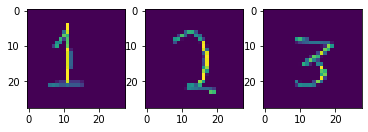

In [ ]:
plt.subplot(1, 3, 1)
plt.imshow(norm_img1)
plt.subplot(1, 3, 2)
plt.imshow(norm_img2)
plt.subplot(1, 3, 3)
plt.imshow(norm_img3)

In [ ]:
norm_img1 = np.array(norm_img1).reshape(-1, input_size, input_size, 1)
norm_img1.shape

(1, 28, 28, 1)

In [ ]:
norm_img2 = np.array(norm_img2).reshape(-1, input_size, input_size, 1)
norm_img2.shape

(1, 28, 28, 1)

In [ ]:
norm_img3 = np.array(norm_img3).reshape(-1, input_size, input_size, 1)
norm_img3.shape

(1, 28, 28, 1)

In [ ]:
norm_img4 = np.array(norm_img4).reshape(-1, input_size, input_size, 1)
norm_img4.shape
norm_img5 = np.array(norm_img5).reshape(-1, input_size, input_size, 1)
norm_img5.shape
norm_img6 = np.array(norm_img6).reshape(-1, input_size, input_size, 1)
norm_img6.shape
norm_img7 = np.array(norm_img7).reshape(-1, input_size, input_size, 1)
norm_img7.shape
norm_img8 = np.array(norm_img8).reshape(-1, input_size, input_size, 1)
norm_img8.shape

(1, 28, 28, 1)

In [ ]:
prediction1 = model.predict(norm_img1)
prediction2 = model.predict(norm_img2)
prediction3 = model.predict(norm_img3)
prediction4 = model.predict(norm_img4)
prediction5 = model.predict(norm_img5)
prediction6 = model.predict(norm_img6)
prediction7 = model.predict(norm_img7)
prediction8 = model.predict(norm_img8)

In [ ]:
print(np.argmax(prediction1))
print(np.argmax(prediction2))
print(np.argmax(prediction3))
print(np.argmax(prediction4))
print(np.argmax(prediction5))
print(np.argmax(prediction6))
print(np.argmax(prediction7))
print(np.argmax(prediction8))

6
2
3
4
5
6
3
8
